In [8]:
from math import floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = pd.read_csv('DataSchoemann2017.csv', sep = ';')
# print(file.head())
number_of_rows = str(len(file))
print(f"the table has {number_of_rows} rows")

print(file.columns)

#   ( ) IMPORTANT ATTRIBUTES TO MEASURE AND SHOW
### (X) Trajectory
### (X) Velocity
### (X) Changes in direction
### ( ) Comparison to straight line

#   ( ) Separate Data by demographics
##  ( ) 
### ( ) 

#   ( ) Transformations of Trajectories 
##  ( ) Simple
### ( ) Rotation
### ( ) Homotethy
### ( ) reflection
### ( ) Translation
##  ( ) Composite

#   ( ) Trajectory-Consuming PYG bot
##  ( ) 
### ( ) 

#   ( ) ML modelling and trajectory generation
##  ( ) 
### ( ) 

#   ( ) Random Trajectory Generation
##  ( ) 
### ( ) 

#   ( ) Other DBs
##  ( ) 
### ( ) 




the table has 17920 rows
Index(['vpnum', 'sex', 'age', 'difference', 'interval', 'response', 'rts',
       'startrts', 'maskduration', 'errors',
       ...
       'ms175_t', 'ms176_t', 'ms177_t', 'ms178_t', 'ms179_t', 'ms180_t',
       'ms181_t', 'ms182_t', 'ms183_t', 'ms184_t'],
      dtype='object', length=566)


In [31]:
def get_trajectory_data( row, kind ):
    if kind in ['x', 'y', 't']:
        if row < len(file):
            ret = []
            for i in range(184):
                epoch = str(i+1)
                value = file[f"ms{epoch}_{kind}"][row]
                if 'IND' not in value:
                    ret.append( float(value) )
#                     print(ret)
#                     print([float(value)])
#                     np.append( ret, [float(value)] )
            return ret
        else:
            print('your row number is too large')
    else:
        print('kind needs to be x, y or t')
    
def trajectory_dict( row ):
    return { 
        'x': get_trajectory_data( row, 'x' ),
        'y': get_trajectory_data( row, 'y' ),
        't': get_trajectory_data( row, 't' ),
    }
    
test_dict = trajectory_dict( 1200 )
print(test_dict)

[]
[0.0]
[]
[0.9928693785]
[]
[2.981902412]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[3.0]
[]
[2.891522054]
[]
[0.8855370603]
[]
[-1.0545087792]
[]
[-2.1053424888]
[]
[-4.2026395066]
[]
[-8.0490868998]
[]
[-9.0938201681]
[]
[-11.0457922794]
[]
[-12.2678171891]
[]
[-18.1287771026]
[]
[-21.2876900165]
[]
[-28.4036118815]
[]
[-38.3950681876]
[]
[-48.5025633078]
[]
[-61.297870331]
[]
[-69.9154306863]
[]
[-96.3464845048]
[]
[-107.6799280532]
[]
[-130.3742822319]
[]
[-144.1631114404]
[]
[-185.4072261421]
[]
[-201.7927485055]
[]
[-234.805104178]
[]
[-269.5814338641]
[]
[-304.2384031672]
[]
[-321.2271480611]
[]
[-339.5043363625]
[]
[-390.1524068012]
[]
[-407.2543608854]
[]
[-440.0843756844]
[]
[-456.140300656]
[]
[-498.0268222265]
[]
[-509.0211541697]
[]
[-527.0]
[]
[974.0]
[]
[974.0]
[]
[973

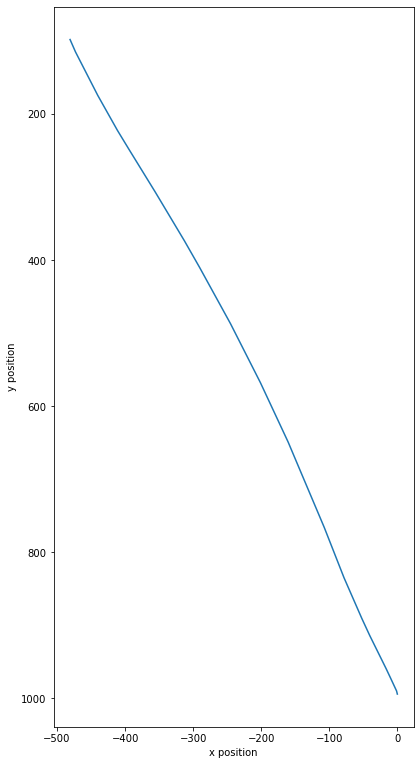

In [25]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

def plot_trajectory( row ):
    data = trajectory_dict( row )
    fig, ax=plt.subplots()
    ax.plot(data['x'], data['y'])
    set_size(5,10)
    ax.invert_yaxis()
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.show()

plot_trajectory( 1998 )    




In [21]:
def get_speed( row, epoch ):
    row_data = trajectory_dict( row )
    if epoch < len(row_data['t']):
        if row <= len(file):
            delta_x = row_data['x'][epoch] - row_data['x'][epoch - 1]
            delta_y = row_data['y'][epoch] - row_data['y'][epoch - 1]
            delta_t = row_data['t'][epoch] - row_data['t'][epoch - 1]
            x_speed = delta_x/delta_t
            y_speed = delta_y/delta_t
#             print('Epoch: ' + str(epoch))
#             print(row_data['x'][epoch] - row_data['x'][epoch - 1])
#             print(row_data['t'][epoch] - row_data['t'][epoch - 1])
#             print((row_data['x'][epoch] - row_data['x'][epoch - 1]) / (row_data['t'][epoch] - row_data['t'][epoch - 1]))
            return [x_speed, y_speed]
        else:
            print('row number out of range')
    else:
        print('there is no epoch ' + str(epoch))
        
def make_speed_list( row ):
    row_data = trajectory_dict( row )
    x_speeds = []
    y_speeds = []
    for epoch in range(1, len(row_data['x'])):
        speeds = get_speed( row, epoch )
        x_speeds.append(speeds[0])
        y_speeds.append(speeds[1])
    return [x_speeds, y_speeds]

def plot_speed( row ):
    speeds = make_speed_list( row )
    plt.plot(speeds[0])
    plt.xlabel('time')
    plt.ylabel('x velocity')
    plt.show()
    plt.plot(speeds[1])
    plt.xlabel('time')
    plt.ylabel('y velocity')
    plt.show()
    
def avg_speed( row ):
    speeds = make_speed_list( row )
    if len(speeds[0]) > 0 and len(speeds[1]) > 0:
        return [sum(speeds[0])/len(speeds[0]), sum(speeds[1])/len(speeds[1])]
    else:
        return 0

def choose_quartile( number_list ):
#     print(len(number_list))
    size = floor(len(number_list)/4)
#     print(size, 2*size, 3*size, 4*size, len(number_list))
    
    
    
# for row in range(30, 35):
#     choose_quartile( make_speed_list( row )[0] )
    

# def avg_speed( row, quartile ):
def get_avg_speed( row ):
    speeds = make_speed_list( row )
    if len(speeds[0]) > 0 and len(speeds[1]) > 0:
        return [sum(speeds[0])/len(speeds[0]), sum(speeds[1])/len(speeds[1])]
    else:
        return 0

# plt.plot(make_speed_list( 1640 )[0])
# plt.show()
# plt.plot(make_speed_list( 1640 )[1])
# plt.show()
# plt.boxplot(make_speed_list( 1640 ))

# print(get_speed( 50, 17 ))
# plot_speed( 50 )
# plot_speed( 51 )
# plot_speed( 52 )
# print(avg_speed( 50 ))

# for row_number in range(20, 80):
#     print(avg_speed(row_number))

# def plot_speed( row ):
#     pass

# def plot_speed( row ):
#     pass

# print('First: ')
# print(make_speed_list (2000)[0])
# print('--------------------')
# print('--------------------')
# print('--------------------')
# print('Second: ')
print(make_speed_list(2000))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -32.96294355353522, -487.650626931132, -443.322813658113, -1157.3180600120497, -952.7751962189028, -3724.3038559476267, -1684.0045014632597, -3866.8066985486616, -4447.339974960117, -4735.069169134259, -2466.408299839683, -2710.378759274108, -7105.270854915013, -4272.60839573761, -2061.669870126718, -1923.126788757098, -4895.557459246183, -2837.951687766453, -1287.6056633040519, -2264.789650035832, -2064.610512628836], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [22]:
def find_change_in_direction( row ):
    speeds = make_speed_list( row )
    ret = []
    count = 0
    for epoch in range(1, len(speeds[0])):
        if np.sign(get_speed( row, epoch )[0]) != np.sign(get_speed( row, epoch - 1 )[0]):
            count += 1
    return count
#         if get_speed( row, epoch )[0] >= 0:
#             ret.append( '+' )
#         else: 
#             ret.append('-')
#     return ret



In [23]:
def get_velocity_data( row ):
    row_data = trajectory_dict( row )
    initial_point = [ row_data['x'][0] , row_data['y'][0] ]
    terminal_point = [ row_data['x'][-1] , row_data['y'][-1] ]    
#     terminal_point = [file[f"ms{184}_{x}"][row], file[f"ms{184}_{y}"][row] ]
#     time_difference = file[f"ms{184}_{t}"][row] - file[f"ms{184}_{y}"][row]
    return [initial_point, terminal_point]


def calculate_constant_velocity( initial_point, terminal_point, time_difference ):
    if time_difference != 0:
        return [
            (terminal_point[0] - initial_point[0])/time_difference, 
            (terminal_point[0] - initial_point[0])/time_difference 
        ]

print(get_velocity_data( 1640 ))

    
# def make_tiny_increment( initial_point, terminal points)

[[0.0, 971.0], [-467.0, 99.0]]


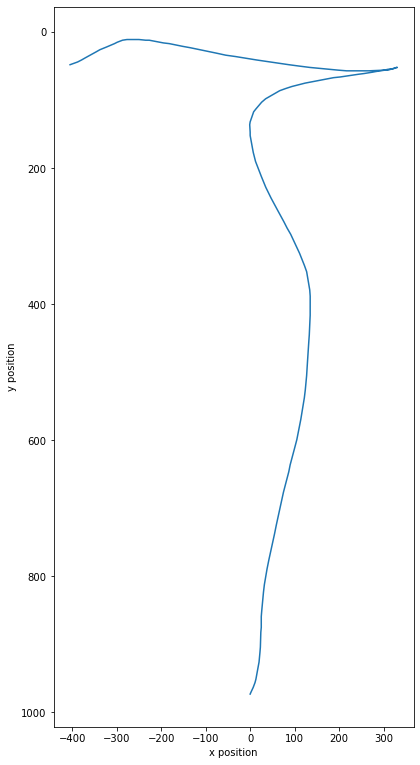

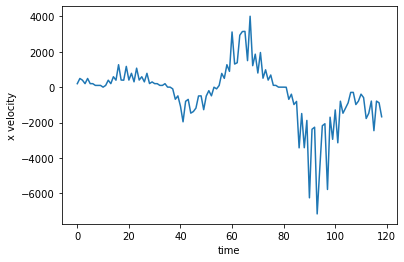

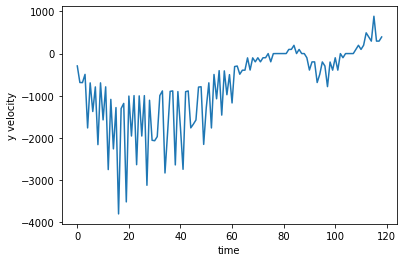

there were: 6 changes


In [28]:
row_number = 5400
number_changes = find_change_in_direction(row_number)

plot_trajectory(row_number)
plot_speed(row_number)
print(f"there were: {number_changes} changes")

# find_change_in_direction(row_number)

In [16]:
# def plot_speed( row ):
# row_number = 17000
# data = trajectory_dict( row_number )

avg_speed1 = []
avg_speed0 = []

lower_limit = 1000
upper_limit = 1030

for row_number in range(lower_limit,  upper_limit):
    if file.iloc[row_number]['sex'] == 1.0:
        avg_speed1.append(get_avg_speed(row_number))
    else:
        avg_speed0.append(get_avg_speed(row_number))
    
print(np.mean(avg_speed1))
print(np.mean(avg_speed0))

#     print( (file.iloc[row_number]['sex']) ==  1.0 )
    
# plt.plot(speeds[0])
# plt.xlabel('time')
# plt.ylabel('x velocity')
# plt.show()
# plt.plot(speeds[1])
# plt.xlabel('time')
# plt.ylabel('y velocity')
# plt.show()


-738.8317305918389
nan


/home/vni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vni/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[]
nan
